# Data Cleaning and Transformation
## Initial Input

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("Manhattan12.csv", header = 4)
data.shape

(27395, 21)

In [2]:
pd.set_option('display.width', 1080)
pd.set_option('display.max_columns', None)

The shape of the data is (27399, 21) as shown above. This means that there is initially 27399 rows and 21 columns of data.

## Column Renaming

In [3]:
data.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APART\nMENT\nNUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE', 'SALE\nPRICE', 'SALE DATE'], dtype='object')

Columns incorrectly named: 'APART\nMENT\nNUMBER', 'SALE\nPRICE'

In [4]:
data = data.rename(columns = {"APART\nMENT\nNUMBER":"APARTMENT NUMBER", "SALE\nPRICE":"SALE PRICE"})

In [5]:
data.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'], dtype='object')

Column names are now correct!

## Create List of Categoricals and Numerics

In [6]:
numericals = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS']
categoricals = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'EASE-MENT',
                'BUILDING CLASS AT PRESENT', 'APARTMENT NUMBER', 'TAX CLASS AT TIME OF SALE', 
                'BUILDING CLASS AT TIME OF SALE', 'BLOCK', 'LOT', 'ADDRESS', 'ZIP CODE', 'YEAR BUILT', 'SALE DATE']

Two lists have been made which contains all the column names. Each column is either in the numerical or categorical list. They are split as followed:

In [7]:
print("Numericals:", str(numericals), "\nCategoricals:", str(categoricals))

Numericals: ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS'] 
Categoricals: ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'APARTMENT NUMBER', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE', 'BLOCK', 'LOT', 'ADDRESS', 'ZIP CODE', 'YEAR BUILT', 'SALE DATE']


## Fixing Numerical Values

In [8]:
for i in numericals:
    if data[i].dtype not in ["int64"]:
        data[i] = data[i].apply(lambda a: a.replace("$", "").replace(",","")).astype("int64")

All values that should be numerical but aren't have now been converted to "int64"

## Converting Sale Date to datetime

In [9]:
data['SALE DATE'] = pd.to_datetime(data['SALE DATE'], dayfirst=True)

"SALE DATE" is now in datetime

## Fixing Categoricals

In [10]:
for i in categoricals:
    data[i] = data[i].replace(to_replace = r'[\s]+', value = "", regex = True)
    data[i] = data[i].replace(to_replace = "",  value = np.nan)

## Replacing Zeros

In [11]:
for i in numericals:
    data[i] = data[i].apply(lambda x: np.nan if x == 0 else x)

# Summary of Missing Values

In [12]:
data.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                         17
BUILDING CLASS CATEGORY            3454
TAX CLASS AT PRESENT                143
BLOCK                                 0
LOT                                   0
EASE-MENT                         27395
BUILDING CLASS AT PRESENT           143
ADDRESS                               0
APARTMENT NUMBER                  14570
ZIP CODE                              0
RESIDENTIAL UNITS                 16372
COMMERCIAL UNITS                  23962
TOTAL UNITS                        9704
LAND SQUARE FEET                  22906
GROSS SQUARE FEET                 23069
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                         7593
SALE DATE                             0
dtype: int64

The above list shows how many values are missing in each column

## Drop Columns

In [13]:
print("size before:", data.shape)
data.drop(columns = ["BOROUGH", "EASE-MENT", "APARTMENT NUMBER"], inplace = True)
print("size after:", data.shape)

size before: (27395, 21)
size after: (27395, 18)


## Drop Duplicates

In [14]:
print("size before:", data.shape)
data.drop_duplicates(inplace = True)
print("size after:", data.shape)

size before: (27395, 18)
size after: (25790, 18)


## Drop Rows with NaN

In [15]:
og_data = pd.DataFrame(data=data)

print("size before:", data.shape)
data.dropna(inplace = True)
print("size after:", data.shape)

size before: (25790, 18)
size after: (470, 18)


# Outliers

For this data, an outlier will be defined as 2 standard deviations from the mean. Theoretically 95% of all values should be within 2 STD from the mean in any distribution.

In [16]:
data.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,4.700000e+02
mean,1115.668085,43.470213,10025.927660,20.376596,2.168085,22.517021,4205.270213,21550.563830,1915.446809,2.165957,1.040005e+07
std,631.103400,61.664113,31.934953,46.634183,3.293633,47.435769,8037.013843,47270.568964,20.445891,0.748923,2.878480e+07
min,11.000000,1.000000,10001.000000,1.000000,1.000000,1.000000,469.000000,1650.000000,1877.000000,1.000000,1.000000e+00
25%,494.250000,18.000000,10012.000000,4.000000,1.000000,5.000000,1875.000000,5807.750000,1900.000000,2.000000,3.050000e+06
50%,1060.000000,32.000000,10020.000000,8.000000,2.000000,10.000000,2469.000000,8972.500000,1910.000000,2.000000,5.150625e+06
75%,1645.000000,50.000000,10030.000000,20.000000,2.000000,23.000000,4071.500000,18087.500000,1920.000000,2.000000,8.593184e+06
max,2230.000000,1001.000000,10463.000000,538.000000,63.000000,550.000000,150322.000000,509090.000000,2011.000000,4.000000,3.800000e+08


This table shows a description of number values (not numerical) in the data and shows some stastics. Initially we can say that BLOCK, LOT, ZIP CODE and TAX CLASS AT TIME OF SALE, cant contain outliers since they are categorical. For the rest we can check if the max and min values are within two standard deviations of the mean. 

<table>
  <tr>
    <th>Column</th>
    <th>Accepted Range</th>
    <th>Data Range</th>
    <th>Contains Outliers</th>
  </tr>  
  <tr>
    <th>COMMERIAL UNITS</th>
    <th>[-4.419181, 8.755351]</th>
    <th>[1, 63]</th>
    <th>yes</th>
  </tr>
  <tr>
    <th>LAND SQUARE FEET</th>
    <th>[-11868.757473, 20279.297899]</th>
    <th>[469, 150322]</th>
    <th>yes</th>
  </tr>
  <tr>
    <th>GROSS SQUARE FEET</th>
    <th>[-72990.574098, 116091.701758]</th>
    <th>[1650, 509090]</th>
    <th>yes</th>
  </tr>  
  <tr>
    <th>RESIDENTIAL UNITS</th>
    <th>[-72.89177, 113.644962]</th>
    <th>[1, 538]</th>
    <th>yes</th>
  </tr>
   <tr>
    <th>TOTAL UNITS</th>
    <th>[-72.354517, 117.388559]</th>
    <th>[1, 550]</th>
    <th>yes</th>
  </tr>
  <tr>
    <th>SALE PRICE</th>
    <th>[-4.7169550e7, 6.7969650e7]</th>
    <th>[1, 3.8e8]</th>
    <th>yes</th>
  </tr>
</table>

This means all of the columns in the table above should have a check to remove outliers

In [17]:
def identify_outlier(df, features):
    temp = np.zeros(df.shape[0])
    desc = df.describe()
    for i in features:
        iqr = desc[i]["75%"] - desc[i]["25%"]
        for j, x in enumerate(df[i]):
            if x < (desc[i]["25%"] - 1.5*(iqr)) or x > (desc[i]["75%"] + 1.5*(iqr)):
                temp[j] = 1
    df['outlier'] = temp
    return df

data = identify_outlier(data, ["LAND SQUARE FEET","GROSS SQUARE FEET","SALE PRICE"])
print("number of outliers identified:", data['outlier'].sum())
data = data[data.outlier == 0]
data.drop('outlier', axis = 1, inplace = True)


number of outliers identified: 95.0


# Summary

In [18]:
data.shape

(375, 18)

The shape of the resulting data is (375, 18). This means there are 18 different columns and 375 different entries and is the end sample size

# Normalisation and lnprice

In [19]:
data["lnprice"] = np.log(data["SALE PRICE"])
data.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,lnprice
count,375.000000,375.000000,375.00000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,3.750000e+02,375.000000
mean,1066.962667,41.424000,10024.97600,9.749333,1.682667,11.405333,2465.288000,9405.034667,1912.106667,2.149333,5.100382e+06,14.933111
std,615.180465,42.043509,33.17297,8.567511,1.025396,9.016679,1162.682965,6026.987976,14.609144,0.762836,3.350443e+06,2.005161
min,11.000000,1.000000,10001.00000,1.000000,1.000000,1.000000,469.000000,1650.000000,1877.000000,1.000000,1.000000e+01,2.302585
25%,474.000000,17.000000,10011.00000,3.000000,1.000000,5.000000,1735.000000,5339.000000,1900.000000,2.000000,2.842488e+06,14.860187
50%,998.000000,33.000000,10019.00000,7.000000,1.000000,8.000000,2320.000000,7685.000000,1910.000000,2.000000,4.500000e+06,15.319588
75%,1561.000000,49.500000,10029.00000,15.000000,2.000000,16.500000,2581.500000,11044.000000,1920.000000,2.000000,6.916875e+06,15.749472
max,2230.000000,505.000000,10463.00000,39.000000,10.000000,42.000000,7064.000000,31500.000000,2010.000000,4.000000,1.665000e+07,16.627921


In [20]:
def normalise(df):
    columns = ["COMMERCIAL UNITS","LAND SQUARE FEET","GROSS SQUARE FEET","RESIDENTIAL UNITS","SALE PRICE", "TOTAL UNITS", "lnprice"]
    desc = df.describe()
    for i in columns:
        temp = np.zeros(df.shape[0])
        for j, x in enumerate(df[i]):
            temp[j] = (x-desc[i]["min"])/(desc[i]["max"]-desc[i]["min"])
        df[i] = temp
    return df

In [21]:
data = normalise(data)
data.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,lnprice
count,375.000000,375.000000,375.00000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000
mean,1066.962667,41.424000,10024.97600,0.230246,0.075852,0.253789,0.302697,0.259800,1912.106667,2.149333,0.306329,0.881691
std,615.180465,42.043509,33.17297,0.225461,0.113933,0.219919,0.176298,0.201909,14.609144,0.762836,0.201228,0.139973
min,11.000000,1.000000,10001.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1877.000000,1.000000,0.000000,0.000000
25%,474.000000,17.000000,10011.00000,0.052632,0.000000,0.097561,0.191964,0.123585,1900.000000,2.000000,0.170719,0.876601
50%,998.000000,33.000000,10019.00000,0.157895,0.000000,0.170732,0.280667,0.202178,1910.000000,2.000000,0.270270,0.908670
75%,1561.000000,49.500000,10029.00000,0.368421,0.111111,0.378049,0.320318,0.314707,1920.000000,2.000000,0.415428,0.938679
max,2230.000000,505.000000,10463.00000,1.000000,1.000000,1.000000,1.000000,1.000000,2010.000000,4.000000,1.000000,1.000000




# Data Exploration



### Visualise the prices across specific neighborhoods
Scatter plots do not work with categorical variables, in this case for specific neighbourhoods. Therefore, to get a real depiction of categorical variable of a neighbourhood affecting price (numerical variable) we can use boxplots. 

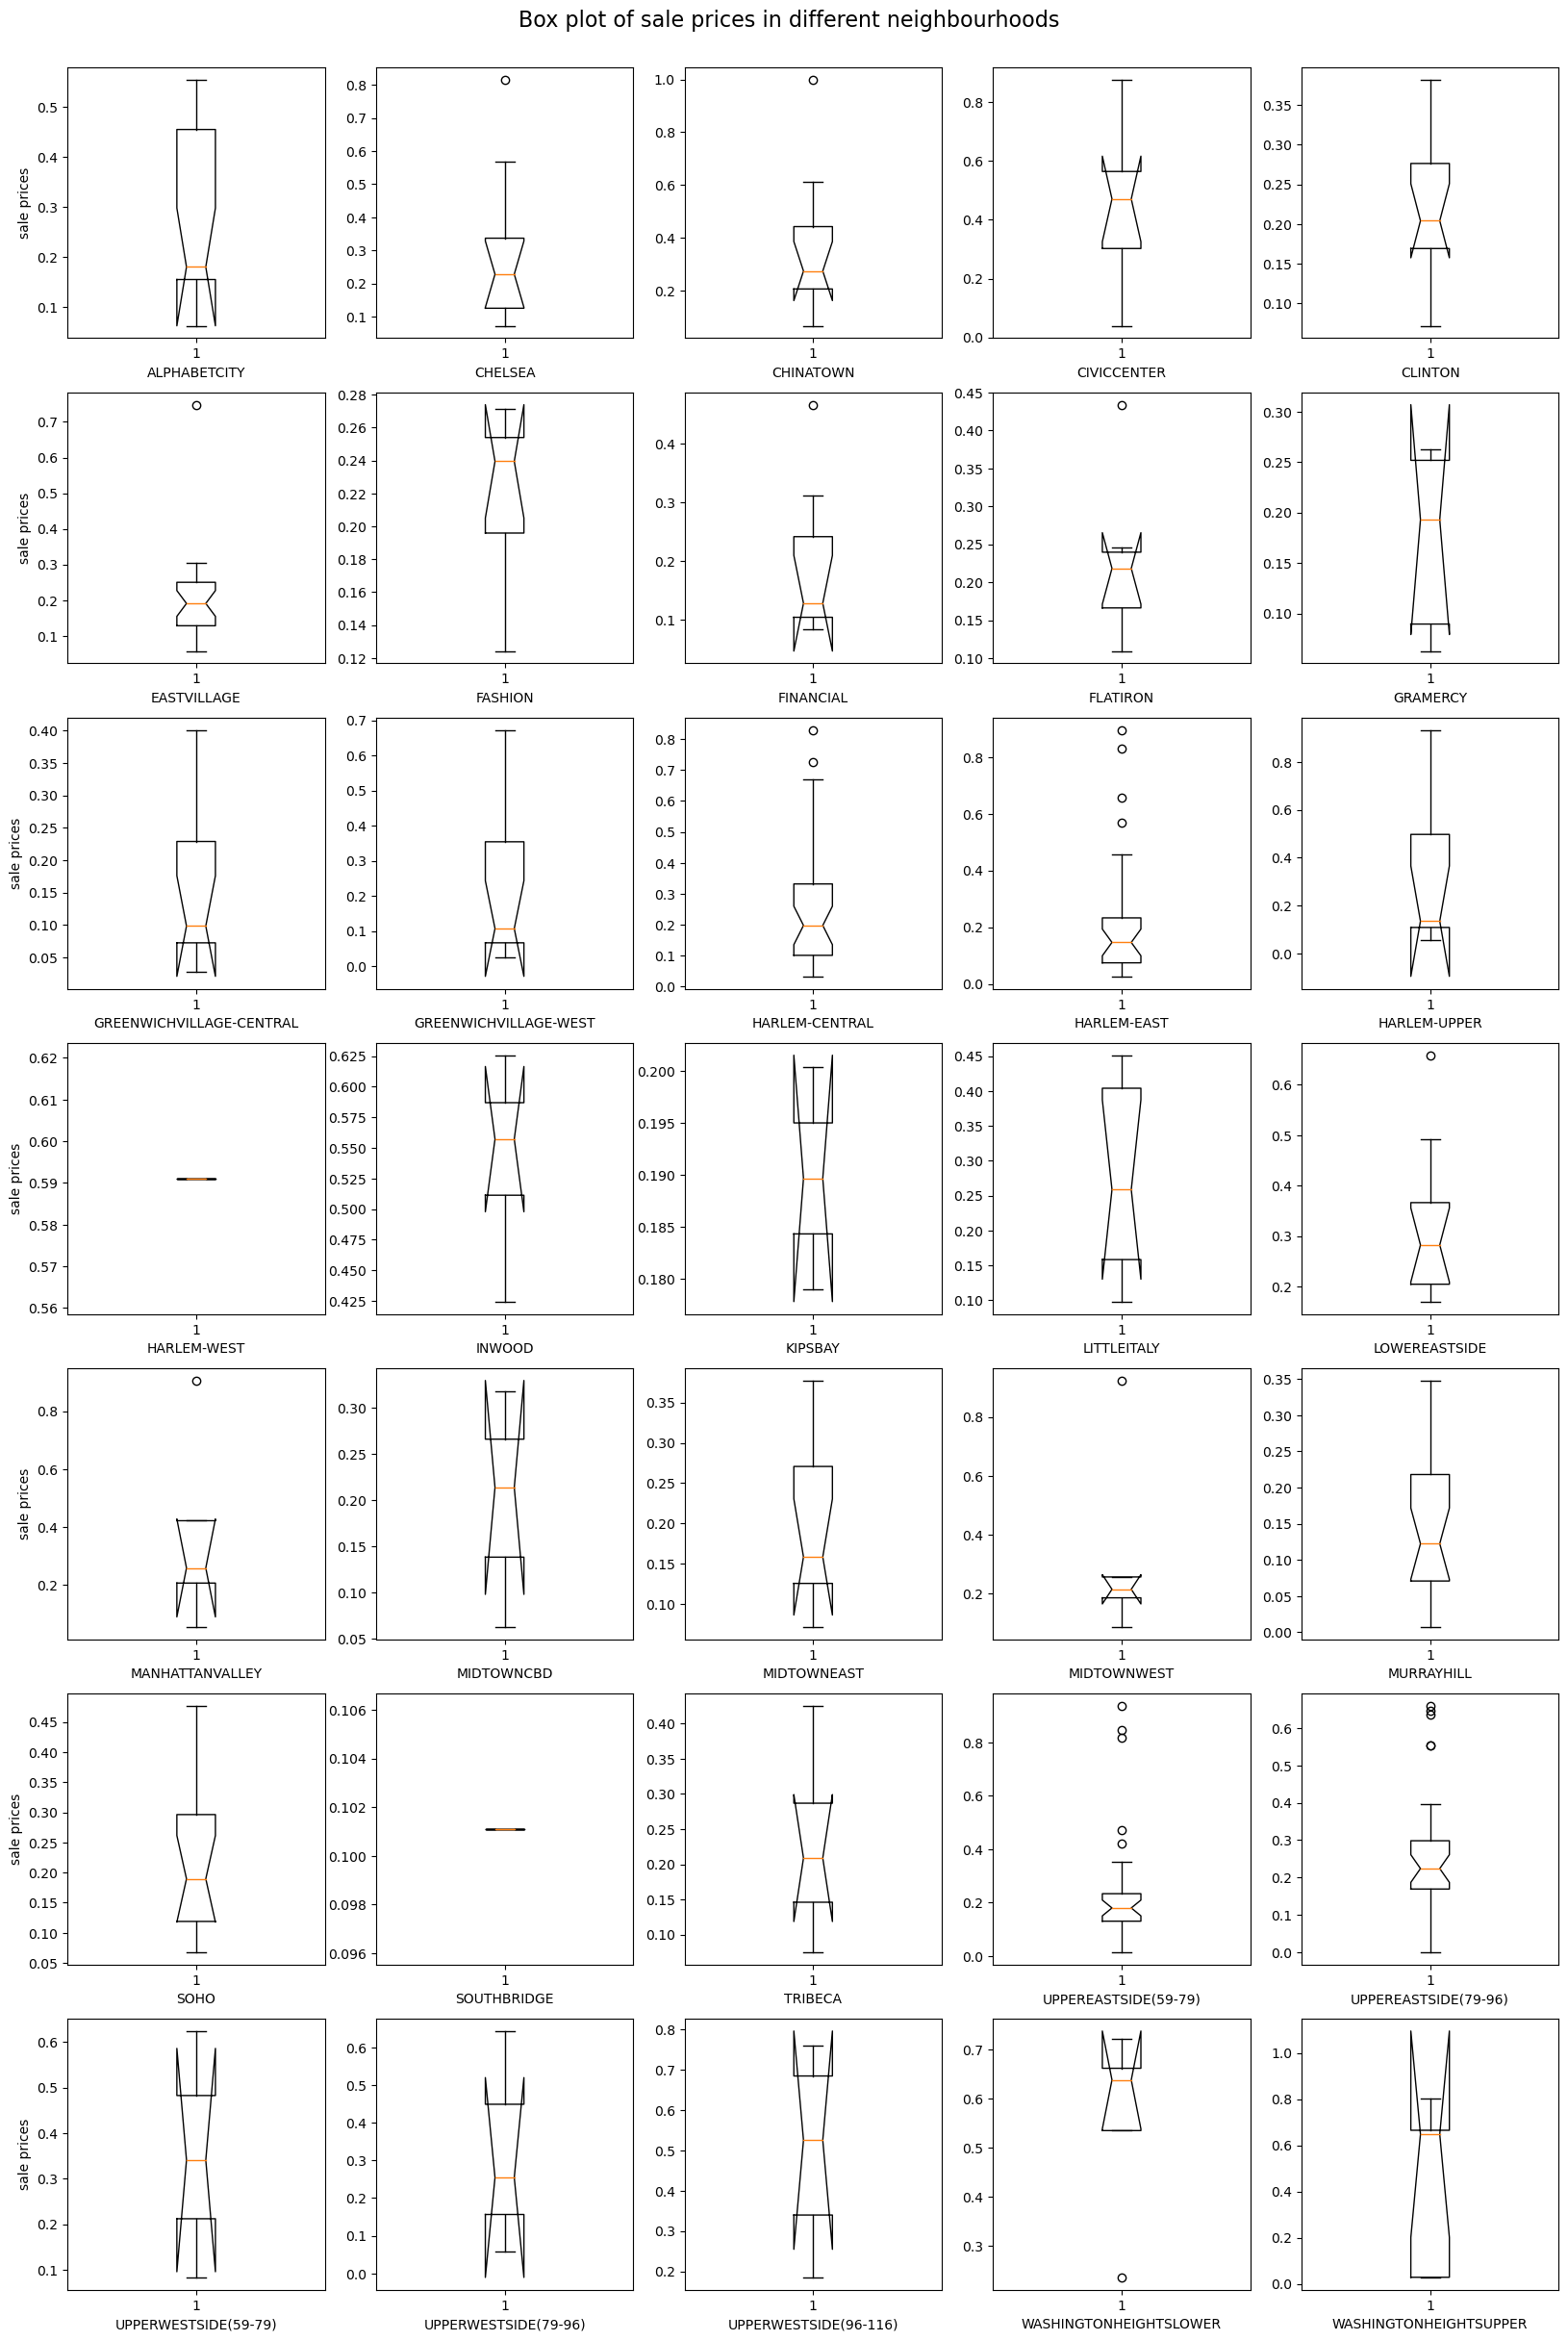

In [22]:
'''
First explore typical prices across different specific neighbourhoods.
'''

def price_neigh(df):
    unique_neigh = df["NEIGHBORHOOD"].unique() 
    fig, axs = plt.subplots(7, 5,figsize=(20, 30), gridspec_kw={'width_ratios': [2, 2, 2, 2, 2],'height_ratios': [8, 8, 8, 8, 8, 8, 8]})
    fig.suptitle('Box plot of sale prices in different neighbourhoods', fontsize=16, y=0.9)
    subr=0
    subc=0
    for un in range(0,len(unique_neigh)):
        dfN = df.loc[df["NEIGHBORHOOD"]==unique_neigh[un]]
        #df.loc[df["NEIGHBORHOOD"]==unique_neigh[un]].boxplot("lnprice","NEIGHBORHOOD", ax)
        axs[subr,subc].boxplot(dfN["GROSS SQUARE FEET"], "NEIGHBORHOOD")
        #axs[subr,subc].set_title("Box plot of sale prices in {}".format(unique_neigh[un]))
        if subc == 0:
            axs[subr,subc].set_ylabel("sale prices")
        axs[subr,subc].set_xlabel(unique_neigh[un])
        axs[subr,subc].set_aspect('auto')
        if subc==4:
            subc=0
            subr+=1
        else:
            subc+=1
    plt.show()
    
    #########-----WHOLE VIEW----###########
    #fig = plt.figure(figsize=(40,12))
    #ax = fig.gca()
    #df.boxplot("lnprice","NEIGHBORHOOD", ax)
    #ax.set_title("Box plot of sale prices in each neighborhood")
    #ax.set_ylabel("sale prices")
    #plt.xticks(rotation=30, ha="right", rotation_mode='anchor')
    #plt.show()
    
price_neigh(data)

Varying price quartiles and medians within different neighbourhoods suggest that the neighbourhood has an impact on overall sale price and should be considered by the model. 



### Visualise the prices over time

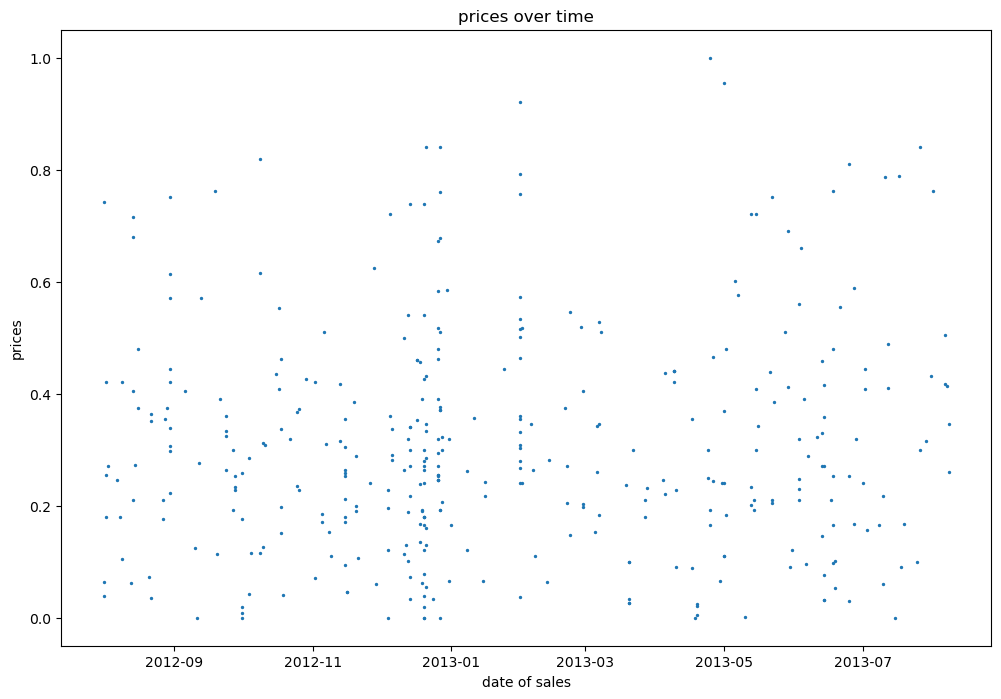

In [23]:
def price_time(df):
    fig, axs = plt.subplots(1,1, figsize=(12,8))
    """
    axs[0].scatter(df["SALE DATE"], df["lnprice"], s=2)
    axs[0].set_title("lnprices over time")
    axs[0].set_ylabel("lnprices")
    axs[0].set_xlabel("date of sales")
    axs[0].set_aspect("auto")
    """
    
    axs.scatter(df["SALE DATE"], df["SALE PRICE"], s=2)
    axs.set_title("prices over time")
    axs.set_ylabel("prices")
    axs.set_xlabel("date of sales")
    axs.set_aspect("auto")
    plt.show()
    
    
price_time(data)


Can see that prices generally lie between 0 and 0.2 over the years with some outliers from 0.2 and beyond (almost reaching 1). Issue with number of datapoints closer to end date - biasing the scatter plot results. Later prices are not congested between 0 and 0.2 and are positioned nearing higher prices than earlier dates.

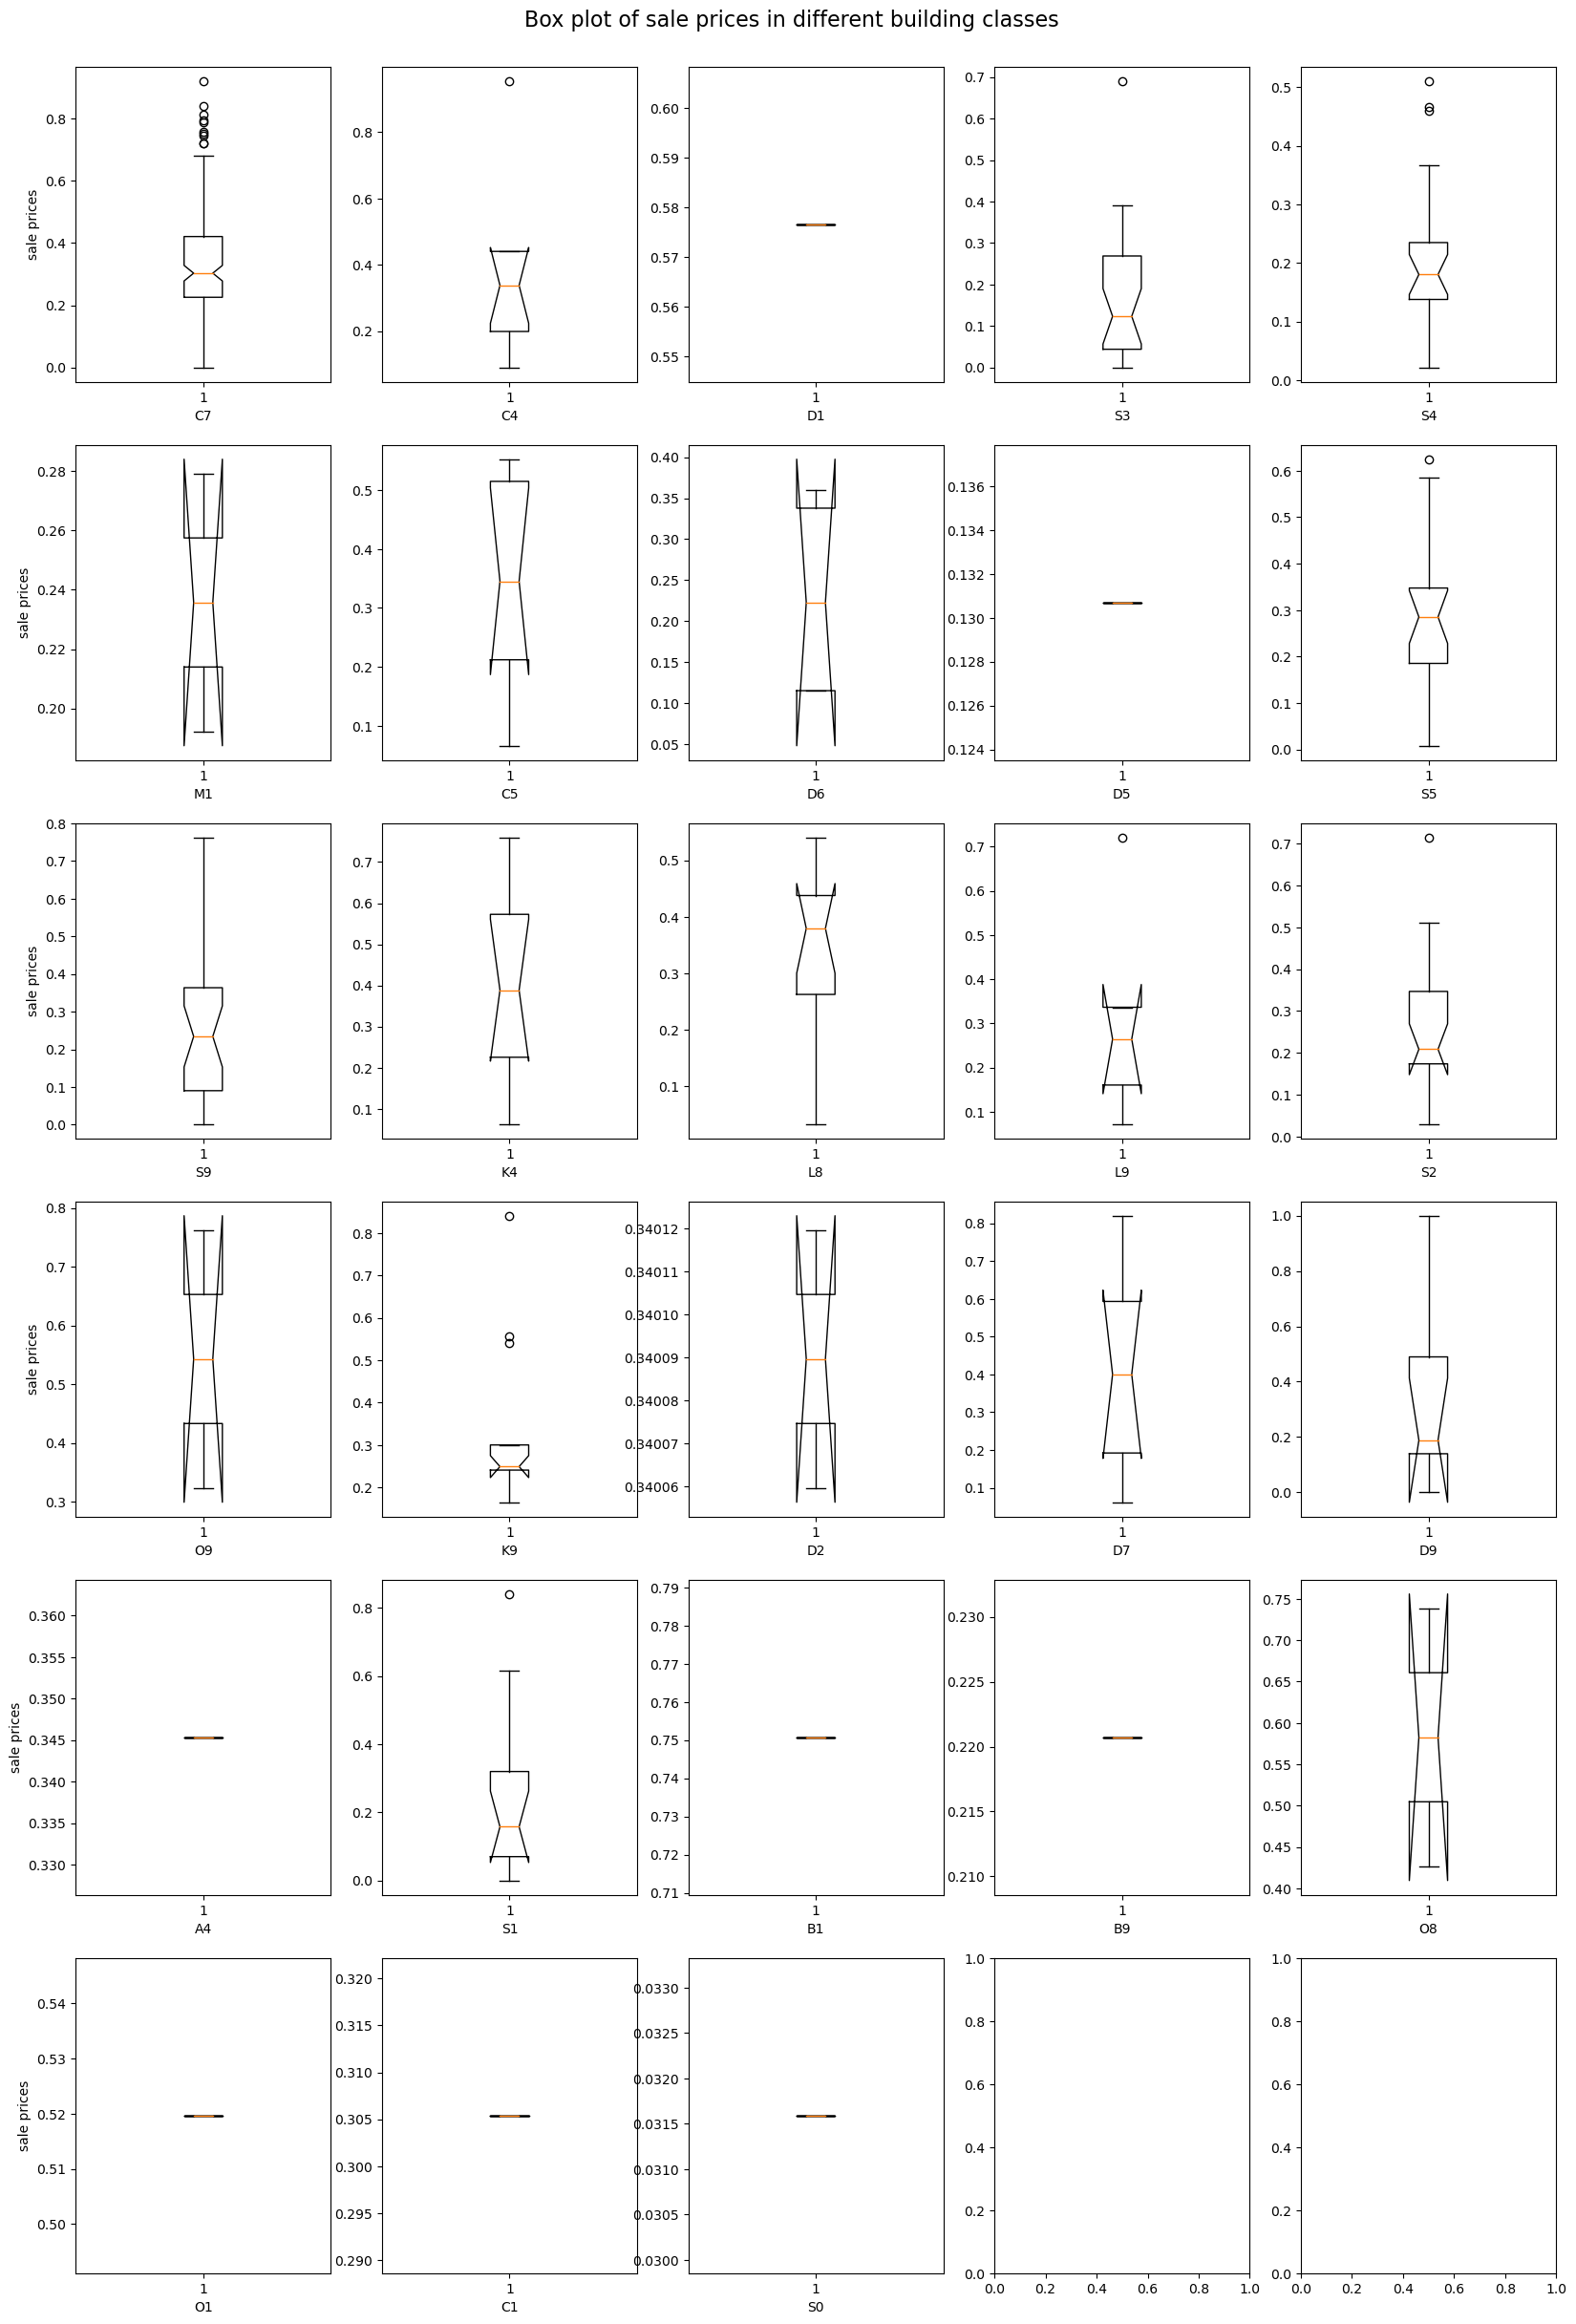

In [24]:
def p_bc(df):
    #data.boxplot("lnprice", "BUILDING CLASS AT TIME OF SALE")
    #plt.show()
    unique_bc = df["BUILDING CLASS AT TIME OF SALE"].unique() 
    fig, axs = plt.subplots(6, 5,figsize=(20, 30), gridspec_kw={'width_ratios': [4, 4, 4, 4, 4],'height_ratios': [6, 6, 6, 6, 6, 6]})
    fig.suptitle('Box plot of sale prices in different building classes', fontsize=16, y=0.9)
    subr=0
    subc=0
    for un in range(0,len(unique_bc)):
        dfN = df.loc[df["BUILDING CLASS AT TIME OF SALE"]==unique_bc[un]]
        axs[subr,subc].boxplot(dfN["SALE PRICE"], "BUILDING CLASS AT TIME OF SALE")
        if subc == 0:
            axs[subr,subc].set_ylabel("sale prices")
        axs[subr,subc].set_xlabel(unique_bc[un])
        axs[subr,subc].set_aspect('auto')
        if subc==4:
            subc=0
            subr+=1
        else:
            subc+=1
    plt.show()
p_bc(data)

Variability within different values of the building class suggest that the class of the property greatly determines the sale price.

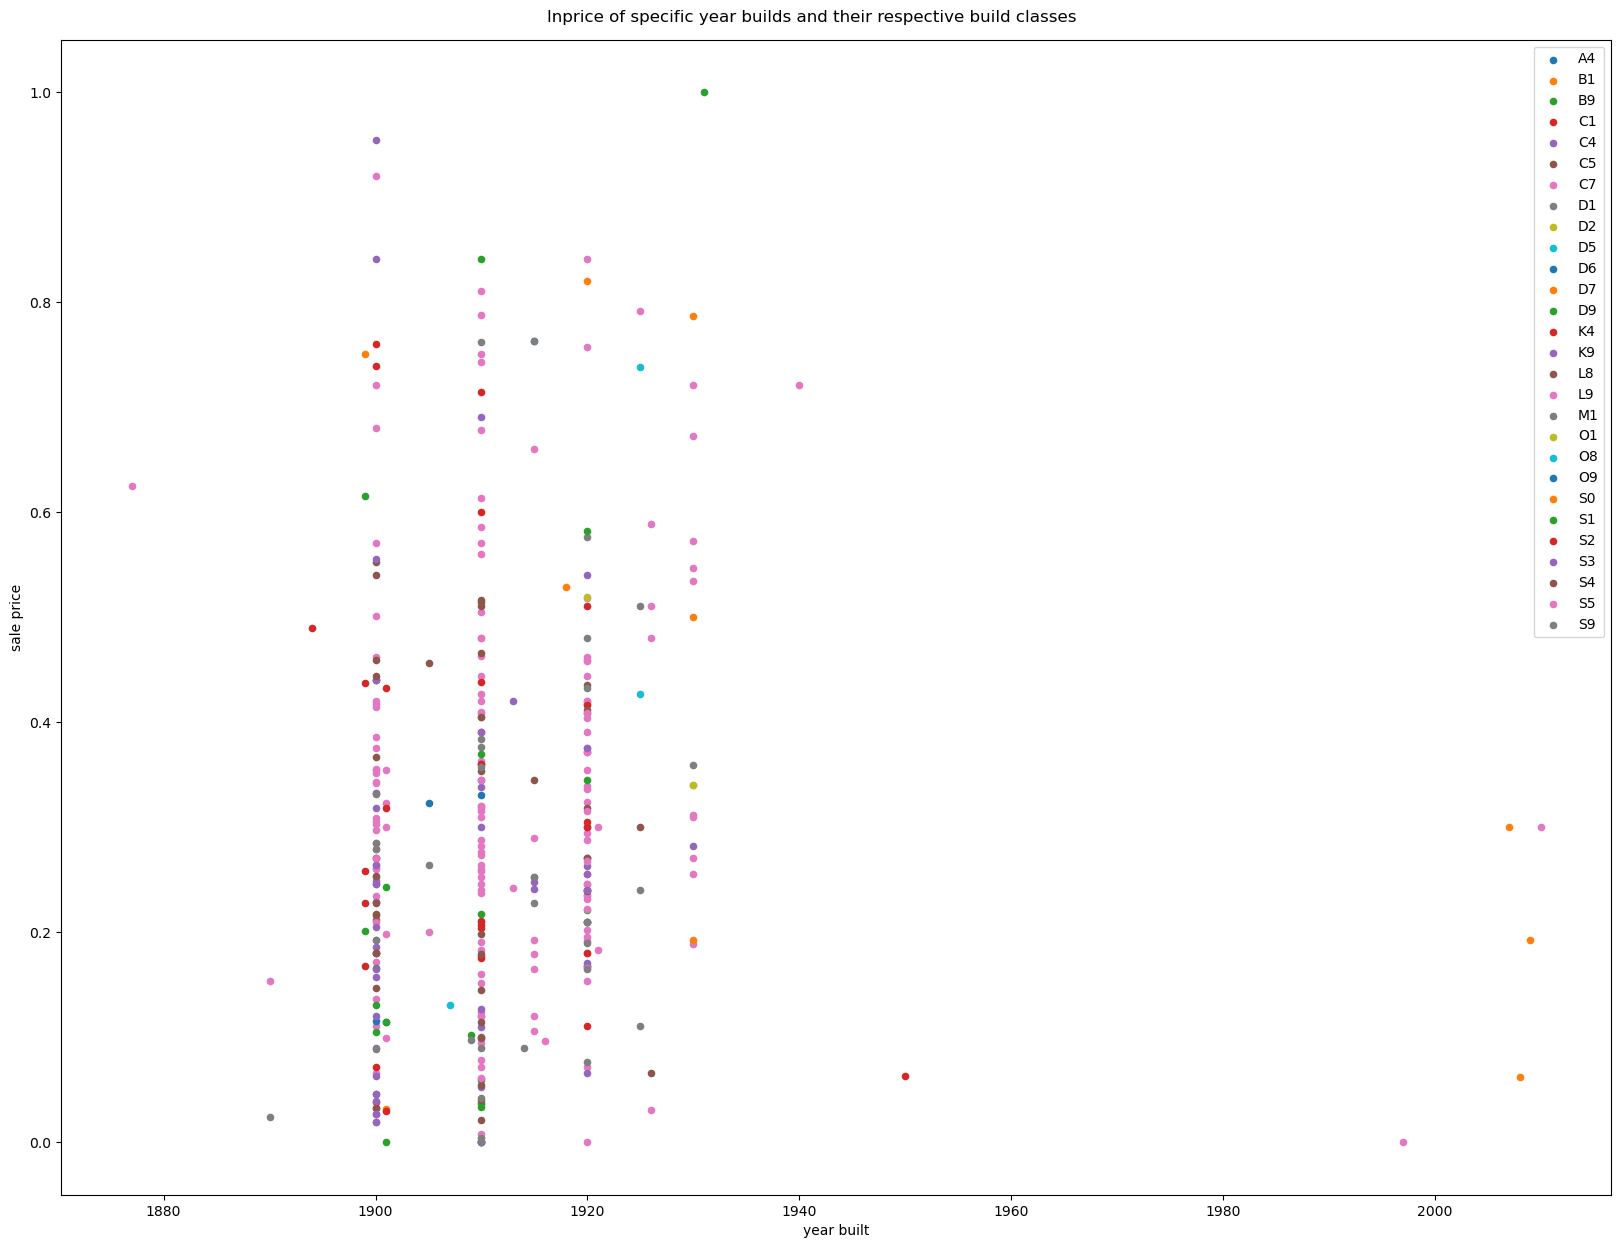

In [25]:
'''
Prices against year of build with colour coding of different building classes
'''
def prices_build(df):
    plt.figure(figsize=(20,15))
    groups = df.groupby('BUILDING CLASS AT TIME OF SALE')
    for name, gdf in groups:
        plt.scatter(gdf["YEAR BUILT"], gdf["SALE PRICE"], s=[5*4], label=name)
    plt.ylabel("sale price")
    plt.xlabel("year built")
    plt.suptitle("lnprice of specific year builds and their respective build classes", y=0.9)
    plt.legend()
    plt.show()
prices_build(data)

From this scatter plot we can conclude that the year build of the property factors greatly into the price. However, the number of data points for later years (>1960) is reduced. This may build some bias in the model predictions to favour the smaller set of data points for later years. Variability within the different classes for price output suggest that the class parameter could be considered in the final model.

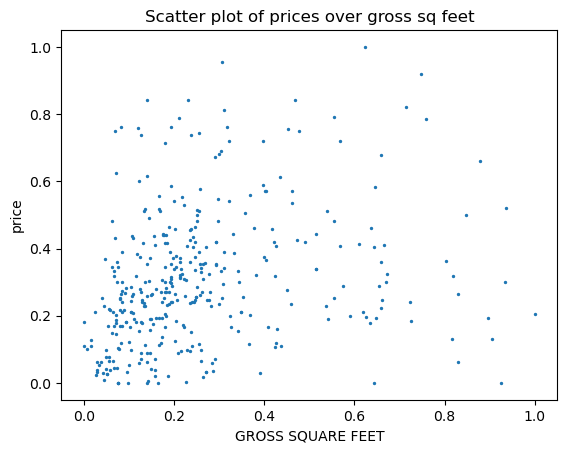

In [26]:
def price_grossSq(df):
    plt.title("Scatter plot of prices over gross sq feet")
    plt.scatter(df["GROSS SQUARE FEET"], df["SALE PRICE"], s=2)
    plt.ylabel("price")
    plt.xlabel("GROSS SQUARE FEET")
    plt.show()
    
    
price_grossSq(data)

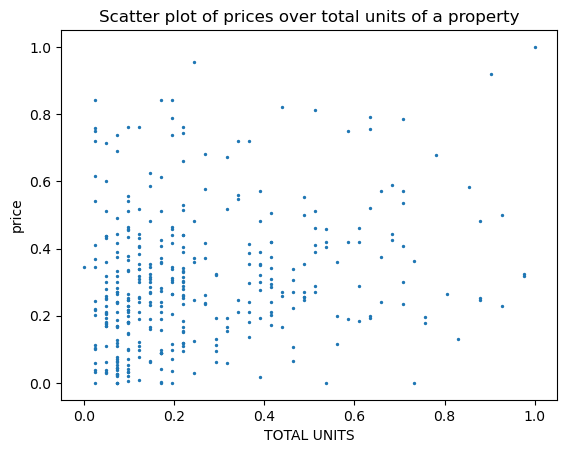

In [27]:
def price_tu(df):
    plt.title("Scatter plot of prices over total units of a property")
    plt.scatter(df["TOTAL UNITS"], df["SALE PRICE"], s=2)
    plt.ylabel("price")
    plt.xlabel("TOTAL UNITS")
    plt.show()
    
    
price_tu(data)

## Scatter plot matrix of numeric variables

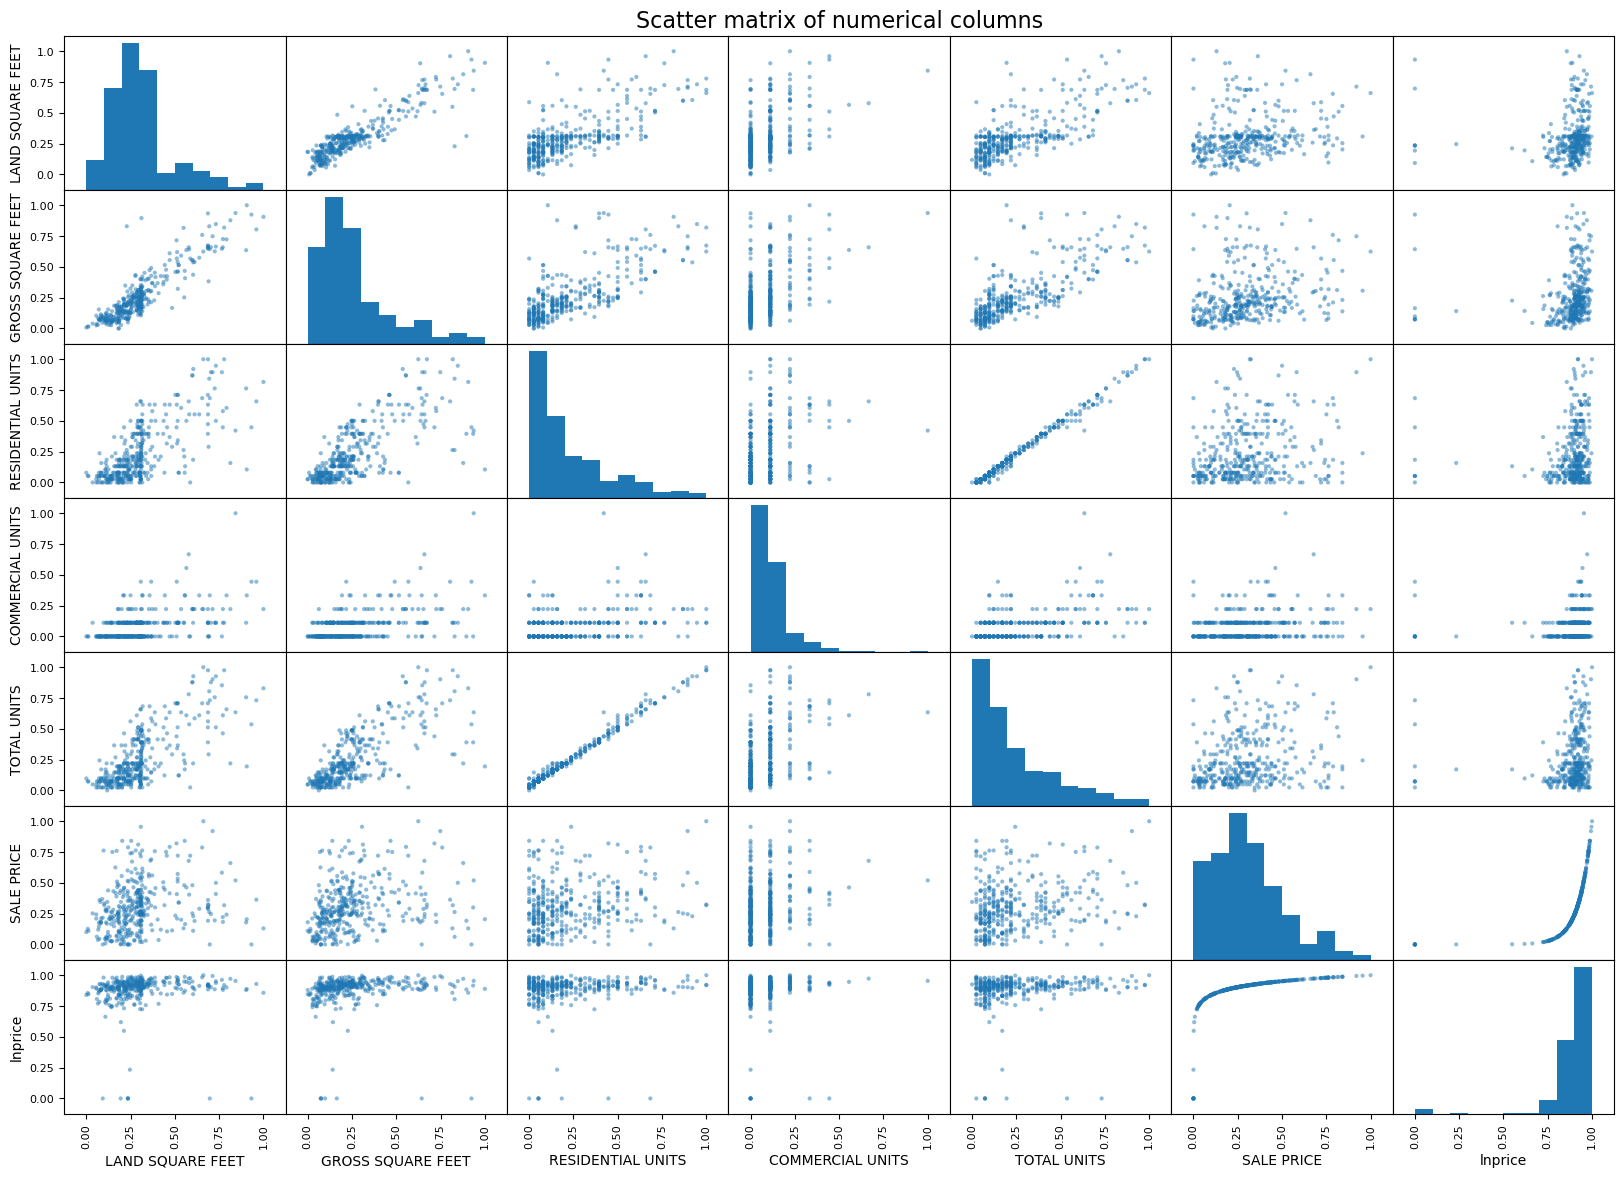

In [28]:
from pandas.plotting import scatter_matrix

def scatter_m(df, numericals):
    scatter_matrix(df[numericals], diagonal='hist', figsize=(20,14), range_padding=0.25)
    plt.title('Scatter matrix of numerical columns', fontsize=16, y=7, x=-2.5)
    plt.show()
    
numericals = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'SALE PRICE','lnprice']
scatter_m(data,numericals)

Collinearities:
- Near perfect positive correlation:
        - Residential units vs Total units
- Very strong positive correlation:
        - Land Square feet vs Gross square feet
        - Land Square feet vs Residential units
        - Land Square feet vs Total units
        - Gross square feet vs Residential units
        - Gross square feet vs Total units
- Weak positive correlation:
        - Commercial units vs Land Square feet
        - Sale price vs land square feet
        - Sale price vs gross square feet
        - Sale price vs Residential units
        - Sale price vs Commercial units
        - Sale price vs Total units
        
## Add negatives after sorting lnprice - NEED TO SORT OUT LNPRICE


## Correlation matrix 

In [29]:
corr = data[numericals].corr().style.background_gradient(cmap="spring")
corr
#styled = corr.style.background_gradient(cmap="spring").setPrecision(3)

,LAND SQUARE FEET,GROSS SQUARE FEET,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,SALE PRICE,lnprice
LAND SQUARE FEET,1.000000,0.893943,0.699087,0.494030,0.721626,0.232682,0.062641
GROSS SQUARE FEET,0.893943,1.000000,0.720043,0.503636,0.742770,0.260210,0.098159
RESIDENTIAL UNITS,0.699087,0.720043,1.000000,0.381410,0.994165,0.224860,0.118166
COMMERCIAL UNITS,0.494030,0.503636,0.381410,1.000000,0.476950,0.226907,0.059920
TOTAL UNITS,0.721626,0.742770,0.994165,0.476950,1.000000,0.237948,0.118016
SALE PRICE,0.232682,0.260210,0.224860,0.226907,0.237948,1.000000,0.558274
lnprice,0.062641,0.098159,0.118166,0.059920,0.118016,0.558274,1.000000


Sale price has higher correl values against other columns and should be used primarily for model outcome rather than lnprice.

# Choosing good predictors

There are 2 ways of choosing predictors for the regression model. You can either use an estimator algorithm that fits the list of numerical columns to find which columns/features best predict the outcome. The number of features we want to select depends on us and in this scenario we want at least 3 so the model generalises well. The second method is to hand pick the predictors based on the correlation matrix and choosing the features with the highest correlation to sale price.

In [30]:
from sklearn import svm, feature_selection, linear_model

def first_ranked_predictors(df, numerical_features, outcome_feature):
    #predictor_features = ['COMMERCIAL UNITS', 'TOTAL UNITS', 'RESIDENTIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
    feature_cols = df[numerical_features].columns.values.tolist()
    #print(feature_cols)

    XO = df[feature_cols]
    YO = df[outcome_feature]
    estimator = svm.SVR(kernel="linear")
    selector = feature_selection.RFE(estimator, n_features_to_select=3, step=3)
    selector = selector.fit(XO, YO)
    # From the ranking you can select your predictors with rank 1
    # Model 1; let us select the folowing features as predictors:
    select_features = np.array(feature_cols)[selector.ranking_ == 1].tolist()
    return select_features

select_features = first_ranked_predictors(data, ['COMMERCIAL UNITS', 'TOTAL UNITS', 'RESIDENTIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET'], 'SALE PRICE')
print(select_features)

['COMMERCIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']


# Data splitting and Model training
sklearn's functions can be used to split the dataset into a large train set and a small test set to compare the predictions with. Since, we want to predict the house sale price we need to use a linear regression model. After, the model is trained we can find the training and test accuracy.

In [31]:
from sklearn.model_selection import train_test_split

def data_split_train(df, predictor_features, outcome_feature):
    X = df[predictor_features]
    Y = df[outcome_feature]
    trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2) #, random_state=42)
    lm = linear_model.LinearRegression()
    lm.fit(trainX, trainY)
    # Inspect the calculated model equations
    print("Y-axis intercept {:6.4f}".format(lm.intercept_))
    print("Weight coefficients:")
    for feat, coef in zip(predictor_features, lm.coef_):
        print(" {:>20}: {:6.4f}".format(feat, coef))
    # The value of R^2
    print("R squared for the training data is {:4.3f}".format(lm.score(trainX, trainY)))
    print("Score against test data: {:4.3f}".format(lm.score(testX, testY)))
    return (lm, testX, testY)

sp_lm, sp_testX, sp_testY = data_split_train(data, ['COMMERCIAL UNITS', 'TOTAL UNITS', 'GROSS SQUARE FEET'], 'SALE PRICE')


Y-axis intercept 0.2306
Weight coefficients:
     COMMERCIAL UNITS: 0.2367
          TOTAL UNITS: 0.0783
    GROSS SQUARE FEET: 0.1360
R squared for the training data is 0.093
Score against test data: 0.037


# Histogram of residuals
Residuals are the difference in the actual value and predicted value to find out how far off the model was.

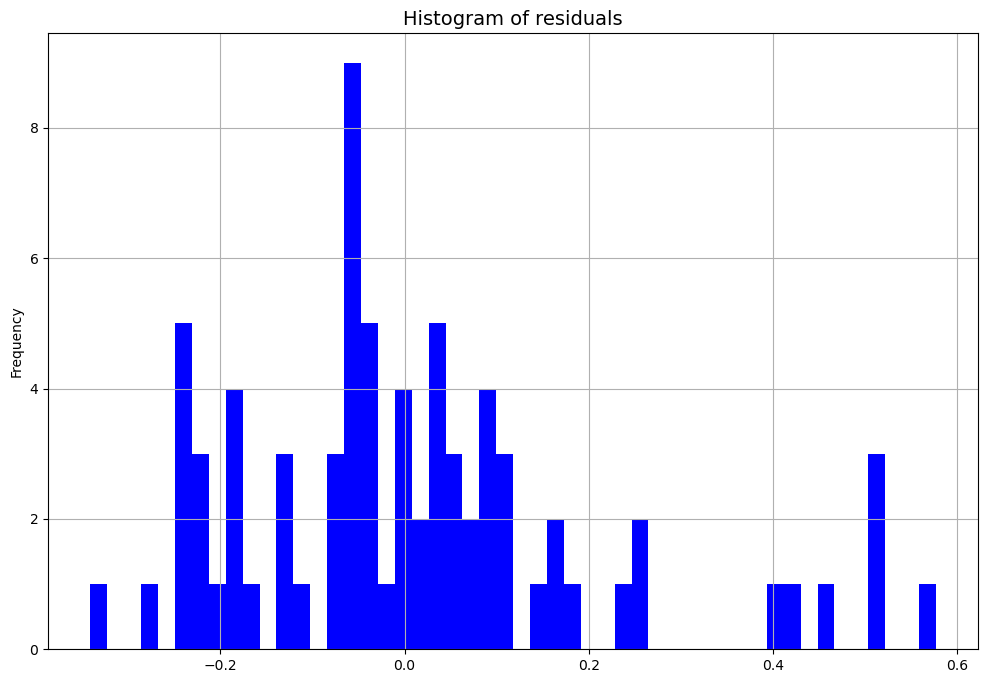

In [32]:
def hist_res(tModel, testX, testY):
    prediction = tModel.predict(testX)
    residuals = (testY - prediction)

    plt.figure(figsize=(12, 8))
    plt.title('Histogram of residuals', fontsize=14)
    plt.hist(residuals, color='blue', bins=50)
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()
    return
hist_res(sp_lm, sp_testX, sp_testY)

# Cross validation

In [33]:
from sklearn.model_selection import cross_val_score

#scores = cross_val_score(lm, X, Y, scoring="explained_variance" cv=5)
#print(scores)

def cv(df, tModel, pred_features, outcome):
    X = df[pred_features]
    Y = df[outcome]
    scores = cross_val_score(tModel, X, Y, cv=5) # 5 K-folds is the default value
    print("Cross validation scores: {}".format(scores))
    print("Cross validation mean scores: {}".format(scores.mean()))
cv(data, sp_lm, ['COMMERCIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET'], 'SALE PRICE')

Cross validation scores: [-0.0171698   0.0763105  -1.52615875 -0.09763015 -0.07702093]
Cross validation mean scores: -0.3283338250841417


# PART 2

## Data Cleaning and Imputation

In [34]:
og_data[og_data['RESIDENTIAL UNITS'].isna()].head(55)

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,738,1306,NaN,345WEST14THSTREET,10014,NaN,NaN,NaN,NaN,NaN,0,2,R4,2214693.0,2013-05-20
1,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,738,1307,NaN,345WEST14THSTREET,10014,NaN,NaN,NaN,NaN,NaN,0,2,R4,1654656.0,2013-05-16
2,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,738,1308,NaN,345WEST14THSTREET,10014,NaN,NaN,NaN,NaN,NaN,0,2,R4,1069162.0,2013-05-23
3,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,738,1309,NaN,345WEST14THSTREET,10014,NaN,NaN,NaN,NaN,NaN,0,2,R4,1374637.0,2013-05-15
4,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,738,1310,NaN,345WEST14THSTREET,10014,NaN,NaN,NaN,NaN,NaN,0,2,R4,1649565.0,2013-05-13
5,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,738,1311,NaN,345WEST14THSTREET,10014,NaN,NaN,NaN,NaN,NaN,0,2,R4,1705568.0,2013-05-21
6,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,738,1312,NaN,345WEST14THSTREET,10014,NaN,NaN,NaN,NaN,NaN,0,2,R4,2036500.0,2013-07-10
7,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,738,1314,NaN,345WEST14THSTREET,10014,NaN,NaN,NaN,NaN,NaN,0,2,R4,2214693.0,2013-06-04
8,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,738,1317,NaN,345WEST14THSTREET,10014,NaN,NaN,NaN,NaN,NaN,0,2,R4,2418343.0,2013-05-31
9,NaN,13CONDOS-ELEVATORAPARTMENTS,NaN,738,1318,NaN,345WEST14THSTREET,10014,NaN,NaN,NaN,NaN,NaN,0,2,R4,2749275.0,2013-05-24


In [35]:
valid_sp_df = og_data[og_data['SALE PRICE'].notna()]


#can use entire df with rows having np nan sale values to predict values in other columns -  bettter picture of gross/land sq feet since
#more data points for predicting those column values NOT SALE PRICE!
temp_sales = og_data[og_data['SALE PRICE'].isna()]#USE LATER

valid_tu_df = valid_sp_df[valid_sp_df['TOTAL UNITS'].notna()]


print("After removing rows with null sale price values")
print(valid_sp_df.shape)
print(valid_sp_df.isna().sum())


print("After removing rows with null total units values")
print(valid_tu_df.shape)
print(valid_tu_df.isna().sum())

valid_lasqft_df = valid_tu_df[valid_tu_df['LAND SQUARE FEET'].notna()]

valid_grsqft_df = pd.DataFrame(valid_lasqft_df[valid_lasqft_df['GROSS SQUARE FEET'].notna()])

print("After removing rows with null land square feet values")
print(valid_lasqft_df.shape)
print(valid_lasqft_df.isna().sum())

print("After removing rows with null gross square feet values")
print(valid_grsqft_df.shape)
print(valid_grsqft_df.isna().sum())


After removing rows with null sale price values
(18928, 18)
NEIGHBORHOOD                         17
BUILDING CLASS CATEGORY            1145
TAX CLASS AT PRESENT                116
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           116
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                 11487
COMMERCIAL UNITS                  17287
TOTAL UNITS                        8807
LAND SQUARE FEET                  16616
GROSS SQUARE FEET                 16690
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64
After removing rows with null total units values
(10121, 18)
NEIGHBORHOOD                         0
BUILDING CLASS CATEGORY           1144
TAX CLASS AT PRESENT                 0
BLOCK                        

In [36]:
"""
valid_tu_df['RESIDENTIAL UNITS'] = valid_tu_df['RESIDENTIAL UNITS'].replace(to_replace = np.nan,  value = 0)
valid_tu_df['COMMERCIAL UNITS'] = valid_tu_df['COMMERCIAL UNITS'].replace(to_replace = np.nan,  value = 0)
valid_tu_df['LAND SQUARE FEET'] = valid_tu_df['LAND SQUARE FEET'].replace(to_replace = np.nan,  value = valid_tu_df['LAND SQUARE FEET'].mean())
valid_tu_df['GROSS SQUARE FEET'] = valid_tu_df['GROSS SQUARE FEET'].replace(to_replace = np.nan,  value = valid_tu_df['GROSS SQUARE FEET'].mean())
"""

"\nvalid_tu_df['RESIDENTIAL UNITS'] = valid_tu_df['RESIDENTIAL UNITS'].replace(to_replace = np.nan,  value = 0)\nvalid_tu_df['COMMERCIAL UNITS'] = valid_tu_df['COMMERCIAL UNITS'].replace(to_replace = np.nan,  value = 0)\nvalid_tu_df['LAND SQUARE FEET'] = valid_tu_df['LAND SQUARE FEET'].replace(to_replace = np.nan,  value = valid_tu_df['LAND SQUARE FEET'].mean())\nvalid_tu_df['GROSS SQUARE FEET'] = valid_tu_df['GROSS SQUARE FEET'].replace(to_replace = np.nan,  value = valid_tu_df['GROSS SQUARE FEET'].mean())\n"

In [37]:
valid_grsqft_df.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,2229.000000,2229.000000,2229.000000,1220.000000,1479.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2.229000e+03
mean,1214.930013,48.506505,10025.415882,17.854098,3.144016,11.852400,5962.631673,54978.694033,1944.990130,2.828174,1.006725e+07
std,533.843426,85.010695,28.329377,35.129387,7.550387,28.027641,8798.686137,74840.507108,45.797422,1.171396,4.248897e+07
min,11.000000,1.000000,10001.000000,1.000000,1.000000,1.000000,469.000000,999.000000,1800.000000,1.000000,1.000000e+00
25%,1009.000000,26.000000,10019.000000,3.000000,2.000000,2.000000,2018.000000,5666.000000,1910.000000,2.000000,8.790200e+04
50%,1009.000000,37.000000,10019.000000,8.000000,2.000000,3.000000,4600.000000,17025.000000,1920.000000,2.000000,2.200000e+06
75%,1665.000000,45.000000,10028.000000,20.000000,2.000000,11.000000,7532.000000,112850.000000,2007.000000,4.000000,6.250000e+06
max,2246.000000,1502.000000,10463.000000,538.000000,150.000000,550.000000,213650.000000,940000.000000,2013.000000,4.000000,1.100000e+09


In [38]:
"""
valid_tu_df = identify_outlier(valid_tu_df)
print("number of outliers identified:", valid_tu_df['outlier'].sum())
valid_tu_df = valid_tu_df[valid_tu_df.outlier == 0]
valid_tu_df.drop('outlier', axis = 1, inplace = True)
"""

'\nvalid_tu_df = identify_outlier(valid_tu_df)\nprint("number of outliers identified:", valid_tu_df[\'outlier\'].sum())\nvalid_tu_df = valid_tu_df[valid_tu_df.outlier == 0]\nvalid_tu_df.drop(\'outlier\', axis = 1, inplace = True)\n'

In [39]:
"""
valid_tu_df["lnprice"] = np.log(valid_tu_df["SALE PRICE"])
valid_tu_df = normalise(valid_tu_df)
"""

'\nvalid_tu_df["lnprice"] = np.log(valid_tu_df["SALE PRICE"])\nvalid_tu_df = normalise(valid_tu_df)\n'

In [40]:
#valid_tu_df.isna().sum()

In [41]:
#ru_na_mask = valid_tu_df['RESIDENTIAL UNITS'] == np.nan
#valid_tu_df.loc[ru_na_mask, 'RESIDENTIAL UNITS'] = valid_tu_df.loc[ru_na_mask, 'RESIDENTIAL UNITS'].fillna(0)

#cu_na_mask = valid_tu_df['COMMERCIAL UNITS'] == np.nan
#valid_tu_df.loc[cu_na_mask, 'COMMERCIAL UNITS'] = valid_tu_df.loc[cu_na_mask, 'COMMERCIAL UNITS'].fillna(0)

"""
valid_tu_df['RESIDENTIAL UNITS'] = valid_tu_df['RESIDENTIAL UNITS'].fillna(0)
valid_tu_df['COMMERCIAL UNITS'] = valid_tu_df['COMMERCIAL UNITS'].fillna(0)
valid_tu_df.isna().sum()
"""

valid_grsqft_df['RESIDENTIAL UNITS'] = valid_grsqft_df['RESIDENTIAL UNITS'].replace(to_replace = np.nan,  value = 0)
valid_grsqft_df['COMMERCIAL UNITS'] = valid_grsqft_df['COMMERCIAL UNITS'].replace(to_replace = np.nan,  value = 0)

valid_grsqft_df.dtypes


NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
ZIP CODE                                   int64
RESIDENTIAL UNITS                        float64
COMMERCIAL UNITS                         float64
TOTAL UNITS                              float64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                               float64
SALE DATE                         datetime64[ns]
dtype: object

In [42]:
cleaned_data = pd.DataFrame(valid_grsqft_df)
cleaned_data.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2.229000e+03
mean,1214.930013,48.506505,10025.415882,9.772095,2.086137,11.852400,5962.631673,54978.694033,1944.990130,2.828174,1.006725e+07
std,533.843426,85.010695,28.329377,27.462871,6.326594,28.027641,8798.686137,74840.507108,45.797422,1.171396,4.248897e+07
min,11.000000,1.000000,10001.000000,0.000000,0.000000,1.000000,469.000000,999.000000,1800.000000,1.000000,1.000000e+00
25%,1009.000000,26.000000,10019.000000,0.000000,0.000000,2.000000,2018.000000,5666.000000,1910.000000,2.000000,8.790200e+04
50%,1009.000000,37.000000,10019.000000,1.000000,2.000000,3.000000,4600.000000,17025.000000,1920.000000,2.000000,2.200000e+06
75%,1665.000000,45.000000,10028.000000,10.000000,2.000000,11.000000,7532.000000,112850.000000,2007.000000,4.000000,6.250000e+06
max,2246.000000,1502.000000,10463.000000,538.000000,150.000000,550.000000,213650.000000,940000.000000,2013.000000,4.000000,1.100000e+09


In [43]:
#valid_tu_df[valid_tu_df['LAND SQUARE FEET'].isna()].tail(59)

In [44]:
cleaned_data.shape

(2229, 18)

In [45]:
cleaned_data.isna().sum()

NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

array([[<AxesSubplot:title={'center':'BLOCK'}>,
        <AxesSubplot:title={'center':'LOT'}>,
        <AxesSubplot:title={'center':'ZIP CODE'}>],
       [<AxesSubplot:title={'center':'RESIDENTIAL UNITS'}>,
        <AxesSubplot:title={'center':'COMMERCIAL UNITS'}>,
        <AxesSubplot:title={'center':'TOTAL UNITS'}>],
       [<AxesSubplot:title={'center':'LAND SQUARE FEET'}>,
        <AxesSubplot:title={'center':'GROSS SQUARE FEET'}>,
        <AxesSubplot:title={'center':'YEAR BUILT'}>],
       [<AxesSubplot:title={'center':'TAX CLASS AT TIME OF SALE'}>,
        <AxesSubplot:title={'center':'SALE PRICE'}>,
        <AxesSubplot:title={'center':'SALE DATE'}>]], dtype=object)

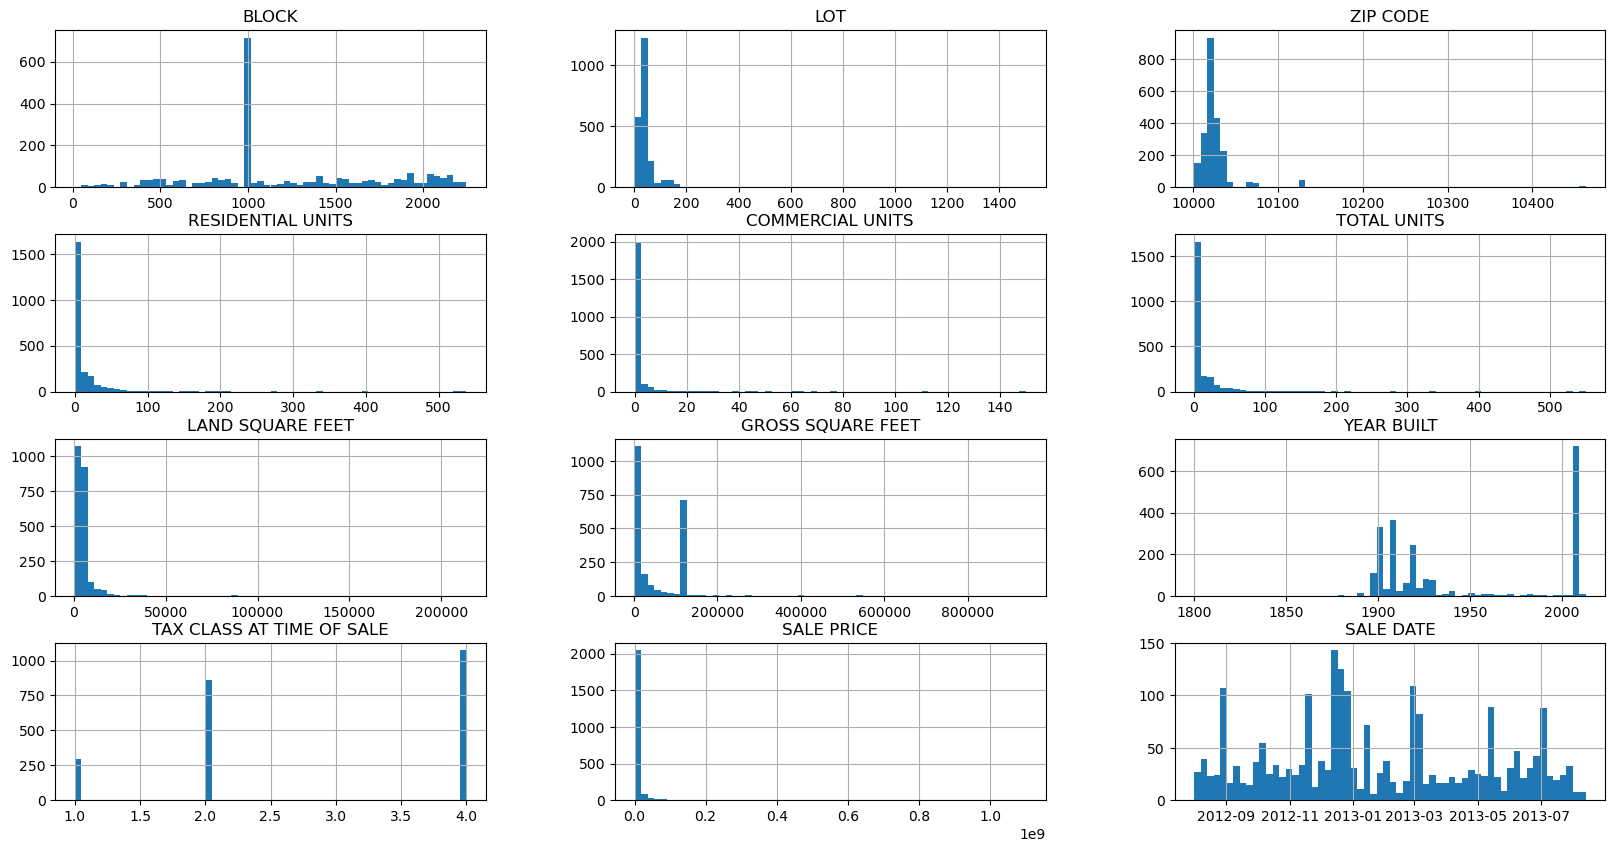

In [46]:
cleaned_data.hist(bins=60, figsize=(20, 10))

In [47]:
cleaned_data = identify_outlier(cleaned_data, ["LAND SQUARE FEET","GROSS SQUARE FEET","SALE PRICE"])
print("number of outliers identified:", cleaned_data['outlier'].sum())
cleaned_data = cleaned_data[cleaned_data.outlier == 0]
cleaned_data.drop('outlier', axis = 1, inplace = True)

number of outliers identified: 255.0


In [48]:
cleaned_data['BUILDING CLASS CATEGORY'] = cleaned_data['BUILDING CLASS CATEGORY'].replace(to_replace = np.nan,  value = 'Missing')

"""
impute_features = ['LAND SQUARE FEET', 'GROSS SQUARE FEET']

for i in impute_features:
    cleaned_data[i] = cleaned_data[i].replace(to_replace = np.nan,  value = cleaned_data[i].mean())

cleaned_data[cleaned_data['LAND SQUARE FEET']==0]
"""

"\nimpute_features = ['LAND SQUARE FEET', 'GROSS SQUARE FEET']\n\nfor i in impute_features:\n    cleaned_data[i] = cleaned_data[i].replace(to_replace = np.nan,  value = cleaned_data[i].mean())\n\ncleaned_data[cleaned_data['LAND SQUARE FEET']==0]\n"

array([[<AxesSubplot:title={'center':'BLOCK'}>,
        <AxesSubplot:title={'center':'LOT'}>,
        <AxesSubplot:title={'center':'ZIP CODE'}>],
       [<AxesSubplot:title={'center':'RESIDENTIAL UNITS'}>,
        <AxesSubplot:title={'center':'COMMERCIAL UNITS'}>,
        <AxesSubplot:title={'center':'TOTAL UNITS'}>],
       [<AxesSubplot:title={'center':'LAND SQUARE FEET'}>,
        <AxesSubplot:title={'center':'GROSS SQUARE FEET'}>,
        <AxesSubplot:title={'center':'YEAR BUILT'}>],
       [<AxesSubplot:title={'center':'TAX CLASS AT TIME OF SALE'}>,
        <AxesSubplot:title={'center':'SALE PRICE'}>,
        <AxesSubplot:title={'center':'SALE DATE'}>]], dtype=object)

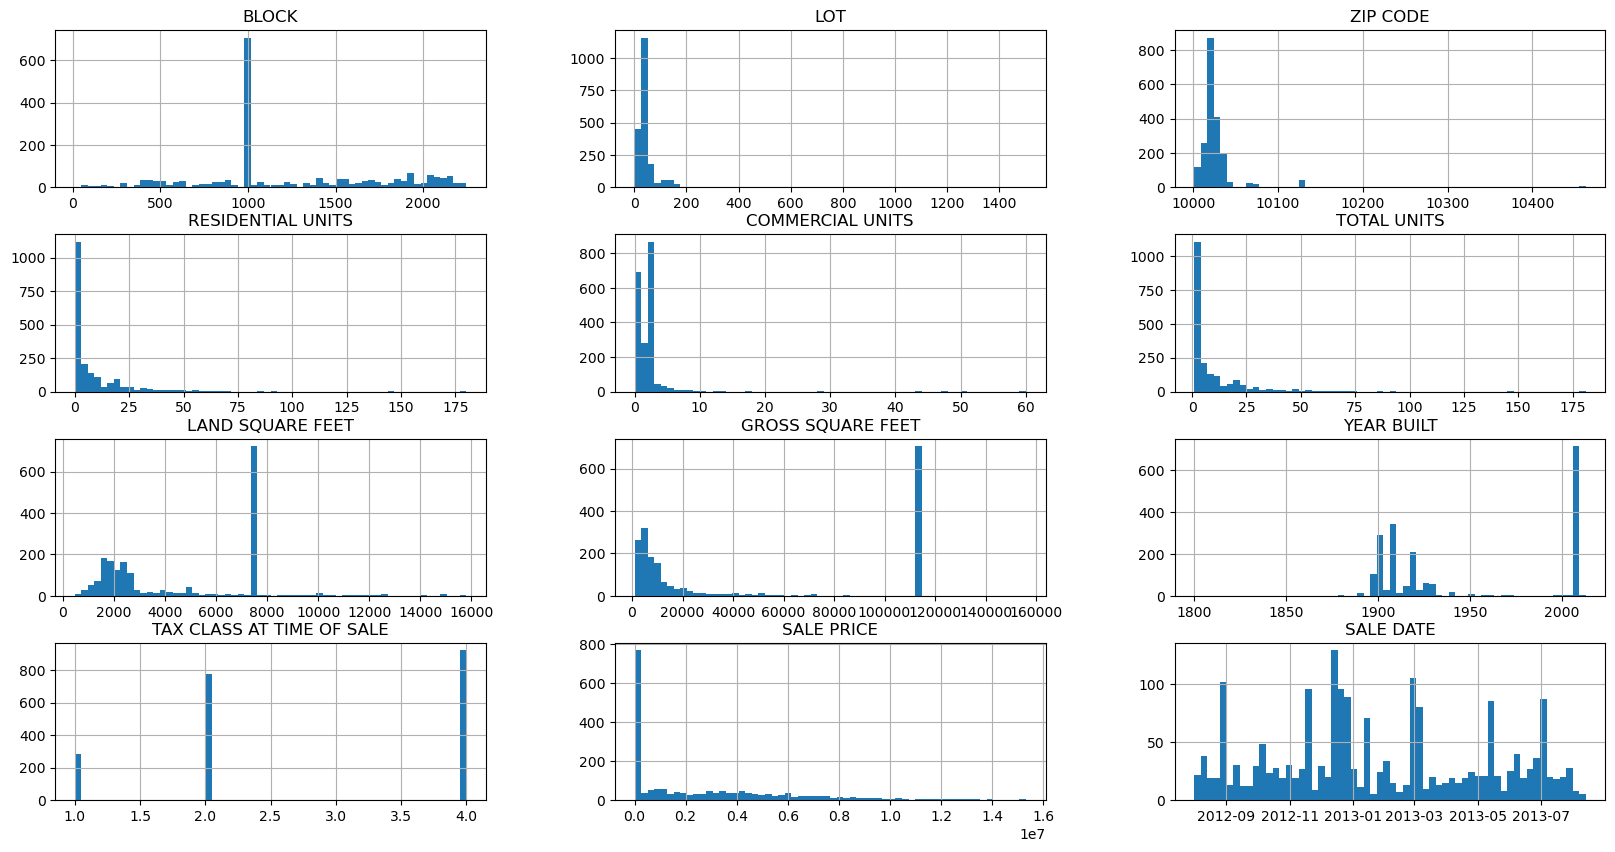

In [49]:
cleaned_data.hist(bins=60, figsize=(20, 10))

In [50]:
cleaned_data.isna().sum()

NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [51]:
cleaned_data["lnprice"] = np.log(cleaned_data["SALE PRICE"])
cleaned_data = normalise(cleaned_data)

In [52]:
cleaned_data.isna().sum()

NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
lnprice                           0
dtype: int64

In [53]:
cleaned_data.shape

(1974, 19)

In [54]:
corr = cleaned_data[numericals].corr().style.background_gradient(cmap="spring")
corr

,LAND SQUARE FEET,GROSS SQUARE FEET,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,SALE PRICE,lnprice
LAND SQUARE FEET,1.000000,0.812452,0.183820,0.224745,0.234357,-0.291504,-0.413247
GROSS SQUARE FEET,0.812452,1.000000,-0.243448,0.213768,-0.194413,-0.549634,-0.630291
RESIDENTIAL UNITS,0.183820,-0.243448,1.000000,-0.102460,0.974555,0.389694,0.316901
COMMERCIAL UNITS,0.224745,0.213768,-0.102460,1.000000,0.123025,-0.020628,-0.123568
TOTAL UNITS,0.234357,-0.194413,0.974555,0.123025,1.000000,0.383706,0.287986
SALE PRICE,-0.291504,-0.549634,0.389694,-0.020628,0.383706,1.000000,0.716006
lnprice,-0.413247,-0.630291,0.316901,-0.123568,0.287986,0.716006,1.000000


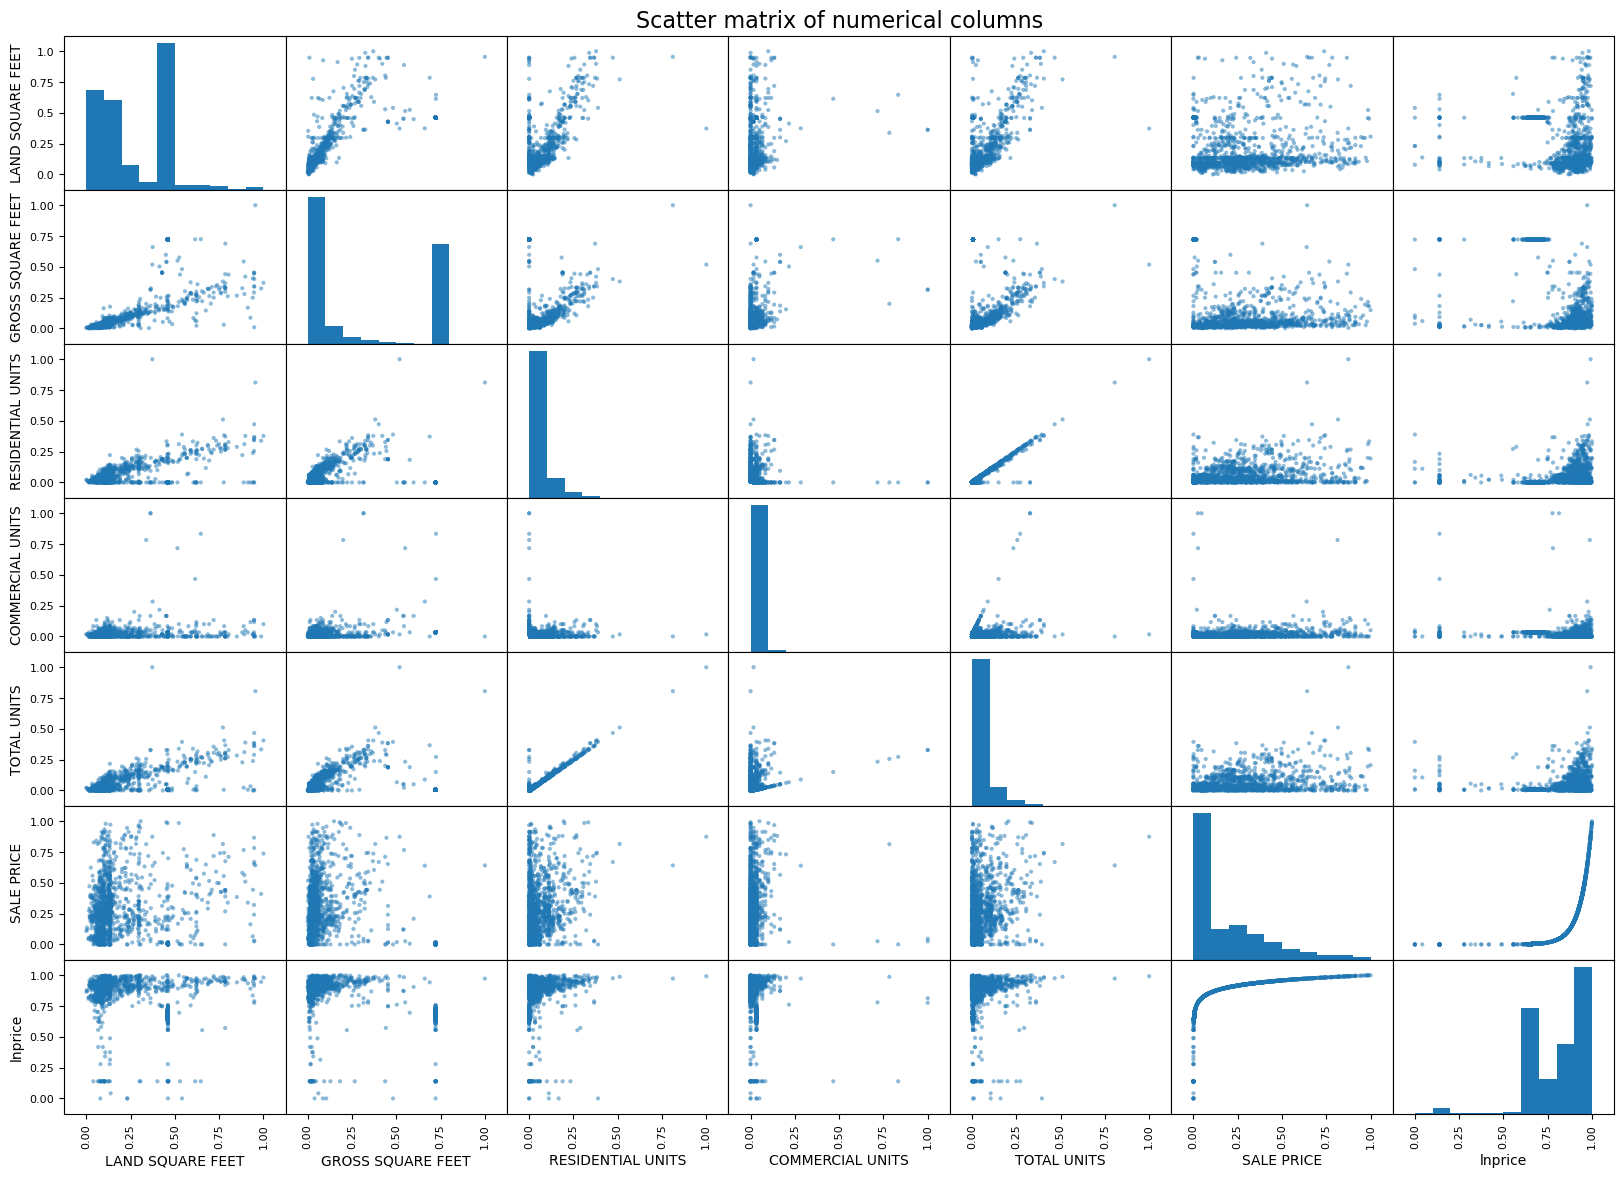

In [55]:
scatter_m(cleaned_data,numericals)

In [56]:
cleanedDf_predictors = first_ranked_predictors(cleaned_data, ['COMMERCIAL UNITS', 'TOTAL UNITS', 'RESIDENTIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET'], 'lnprice')
print(cleanedDf_predictors)


['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']


In [57]:
cleaned_lm, cleaned_testX, cleaned_testY = data_split_train(cleaned_data, ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'TOTAL UNITS'], 'lnprice')


Y-axis intercept 0.8694
Weight coefficients:
     LAND SQUARE FEET: 0.1018
    GROSS SQUARE FEET: -0.3445
          TOTAL UNITS: 0.3288
R squared for the training data is 0.470
Score against test data: 0.312


In [58]:
cv(cleaned_data, cleaned_lm, ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'TOTAL UNITS'], 'lnprice')

Cross validation scores: [ 0.00853971 -0.12055336  0.12120579  0.59641564 -0.13355245]
Cross validation mean scores: 0.09441106738224973


In [59]:
pd.DataFrame(cleaned_data['TAX CLASS AT PRESENT'].value_counts())
#combine 2a 2b 2c iintto 2 

,TAX CLASS AT PRESENT
4,918
2,443
1,283
2B,177
2A,150
2C,3


In [60]:
from sklearn.ensemble import RandomForestRegressor

def rf_train(df, predictor_features, outcome_feature):
    X = df[predictor_features]
    Y = df[outcome_feature]
    trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2) #, random_state=42)
    rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(trainX, trainY)
    print("R squared for the training data is {:4.3f}".format(rf.score(trainX, trainY)))
    print("Score against test data: {:4.3f}".format(rf.score(testX, testY)))
    return rf


In [61]:
rf_model = rf_train(cleaned_data, ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'TOTAL UNITS'], 'lnprice')

R squared for the training data is 0.561
Score against test data: 0.516


In [62]:
#cv(cleaned_data, rf_model, ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'TOTAL UNITS'], 'lnprice')